## Health Insurance Cost Analysis and Prediction : TOTO_AFYA_CARD

Columns
1. S/n: This indicates the number of individuals( 574 Childrens ) in the Dataset
2. Gender: The type of gender this indicates male and female in the dataset.
3. Category: This is the type of the hospital/Clinic/Dipensary tha a patient takes services.
4. Ownership: This indicates who owns the hospital faith based, public or private.
5. Age: This indicates how old are the Kids. 
6. Region: Indicates the places where childresn data we taken
7. VisitsGroup22: Indicate a group for number of times a patient use/visit the center to determine if is normal patient reqular or frequent.
8. age_group : Indicate group of children age to understand the gape of most affected age group.
9. Area_Type : Indicate the area in which the health center or service was provided
10. Visits Jul 22: It indicate number of times a patient use/visit the center in 2022.
11. Amount Paid Jul 22: It indicate amount paid by every child for service in 202

In [201]:
# Importing the necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [202]:
# Loading and Exploring the dataset
# df = pd.read_excel('TOTO AFYA-MBEYA 2.xlsx')
df = pd.read_csv("New Cleaned Datafile.csv")
df = df.drop(['Amount Paid Jul 21','Visits Jul 21','VisitsGroup21'], axis = 1)
df.head() 

,S/n,Gender,Age,Category,Ownership,Region,Visits Jul 22,Amount Paid Jul 22,age_group,Area_Type,VisitsGroup22
0,1,Female,4,Specialized Clinic (Polyclinic),Private,Temeke,1,11600,Toddlers 0-4,Urban,Normal Patient
1,2,Male,4,Specialized Clinic (Polyclinic),Private,Ilala,2,46960,Toddlers 0-4,Urban,Regular Patient
2,3,Male,4,Health Centre,Faith Based,Morogoro,1,3900,Toddlers 0-4,Rural,Normal Patient
3,4,Male,4,Dispensary,Private,Unguja,3,18460,Toddlers 0-4,Rural,Regular Patient
4,5,Male,9,Zonal Referral Hospital,Faith Based,Kilimanjaro,3,49700,School-age children: 6-12,Semi-Urban,Regular Patient


In [203]:
# Rows and columns 
print('Number of rows:', df.shape[0]," ",'Number of columns:', df.shape[1]) 

Number of rows: 574   Number of columns: 11


In [204]:
# Detail of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574 entries, 0 to 573
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   S/n                 574 non-null    int64 
 1   Gender              574 non-null    object
 2   Age                 574 non-null    int64 
 3   Category            574 non-null    object
 4   Ownership           574 non-null    object
 5   Region              574 non-null    object
 6   Visits Jul 22       574 non-null    int64 
 7   Amount Paid Jul 22  574 non-null    int64 
 8   age_group           574 non-null    object
 9   Area_Type           574 non-null    object
 10  VisitsGroup22       574 non-null    object
dtypes: int64(4), object(7)
memory usage: 49.5+ KB


Based on the results from info, we see that there are no null values in the data and the different data types of the columns

In [205]:
# General statistical description of Numerical variables
df.describe()

,S/n,Age,Visits Jul 22,Amount Paid Jul 22
count,574.000000,574.000000,574.000000,574.000000
mean,301.789199,7.898955,1.496516,35758.040070
std,174.465184,3.535445,1.157337,51451.268525
min,1.000000,3.000000,1.000000,1000.000000
25%,152.250000,5.000000,1.000000,10800.000000
50%,302.500000,7.000000,1.000000,21525.000000
75%,451.750000,10.000000,2.000000,41000.000000
max,606.000000,17.000000,17.000000,597220.000000


Based on the results from describe, there seems to be a data that are categorical in nature, but are assigned as integer/float data type. 

In [206]:
# General statistical description of Categorical variables
df.describe(include=['object'])

,Gender,Category,Ownership,Region,age_group,Area_Type,VisitsGroup22
count,574,574,574,574,574,574,574
unique,2,9,3,23,4,3,3
top,Male,Dispensary,Private,Kinondoni,School-age children: 6-12,Urban,Normal Patient
freq,311,119,442,233,253,358,403


## Visualizing The Data 
### Distribution of Age

<AxesSubplot: xlabel='Age', ylabel='Density'>

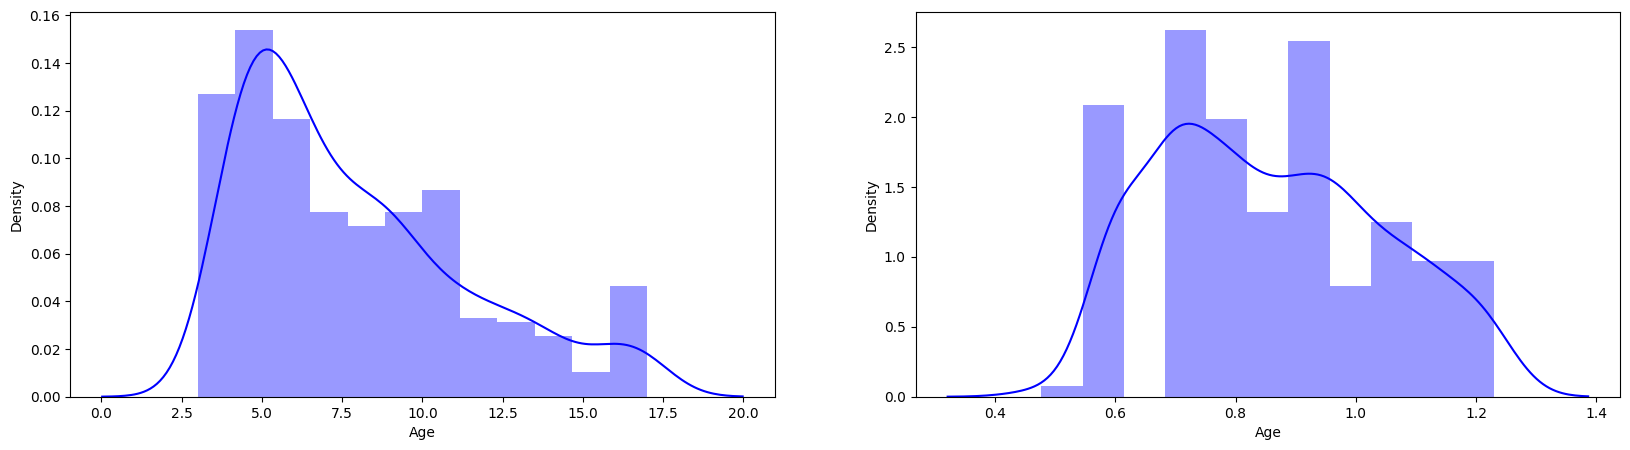

In [207]:
# Distribution of the charges
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
sns.distplot(df.Age, color = 'b')

# Natural Log for approximately normal distribution
plt.subplot(1,2,2)
sns.distplot(np.log10(df.Age), color = 'b')

Note: The distribution of the age is skewed to the right, so we applied natural log for ~ normal distribution.

## Data Correlation 

To confirm our findings, let's look at the correlation between all the columns by constructing a pairplot and correlation heatmap. 


In order to do so, we need to first convert all object labels into categorical variables and then convert them to numerical values.

In [216]:
# Converting data to categorical type data
df[['Region','Gender','Category', 'Ownership','age_group','Area_Type','VisitsGroup22']] = df[['Region','Gender','Category', 'Ownership','age_group','Area_Type','VisitsGroup22']].astype('category')
df.dtypes

S/n                      int64
Gender                category
Age                      int64
Category              category
Ownership             category
Region                category
Visits Jul 22            int64
Amount Paid Jul 22       int64
age_group             category
Area_Type             category
VisitsGroup22         category
dtype: object

In [217]:
# Converting Data to numerical type using LabelEncoder
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

label.fit(df.Region.drop_duplicates())
df.Region = label.transform(df.Region)

label.fit(df.Gender.drop_duplicates())
df.Gender = label.transform(df.Gender)

label.fit(df.Category.drop_duplicates())
df.Category = label.transform(df.Category)

label.fit(df.Ownership.drop_duplicates())
df.Ownership = label.transform(df.Ownership)

label.fit(df.age_group.drop_duplicates())
df.age_group = label.transform(df.age_group)

label.fit(df.Area_Type.drop_duplicates())
df.Area_Type = label.transform(df.Area_Type)

label.fit(df.VisitsGroup22.drop_duplicates())
df.VisitsGroup22 = label.transform(df.VisitsGroup22)

df.dtypes

S/n                   int64
Gender                int32
Age                   int64
Category              int32
Ownership             int32
Region                int32
Visits Jul 22         int64
Amount Paid Jul 22    int64
age_group             int32
Area_Type             int32
VisitsGroup22         int32
dtype: object

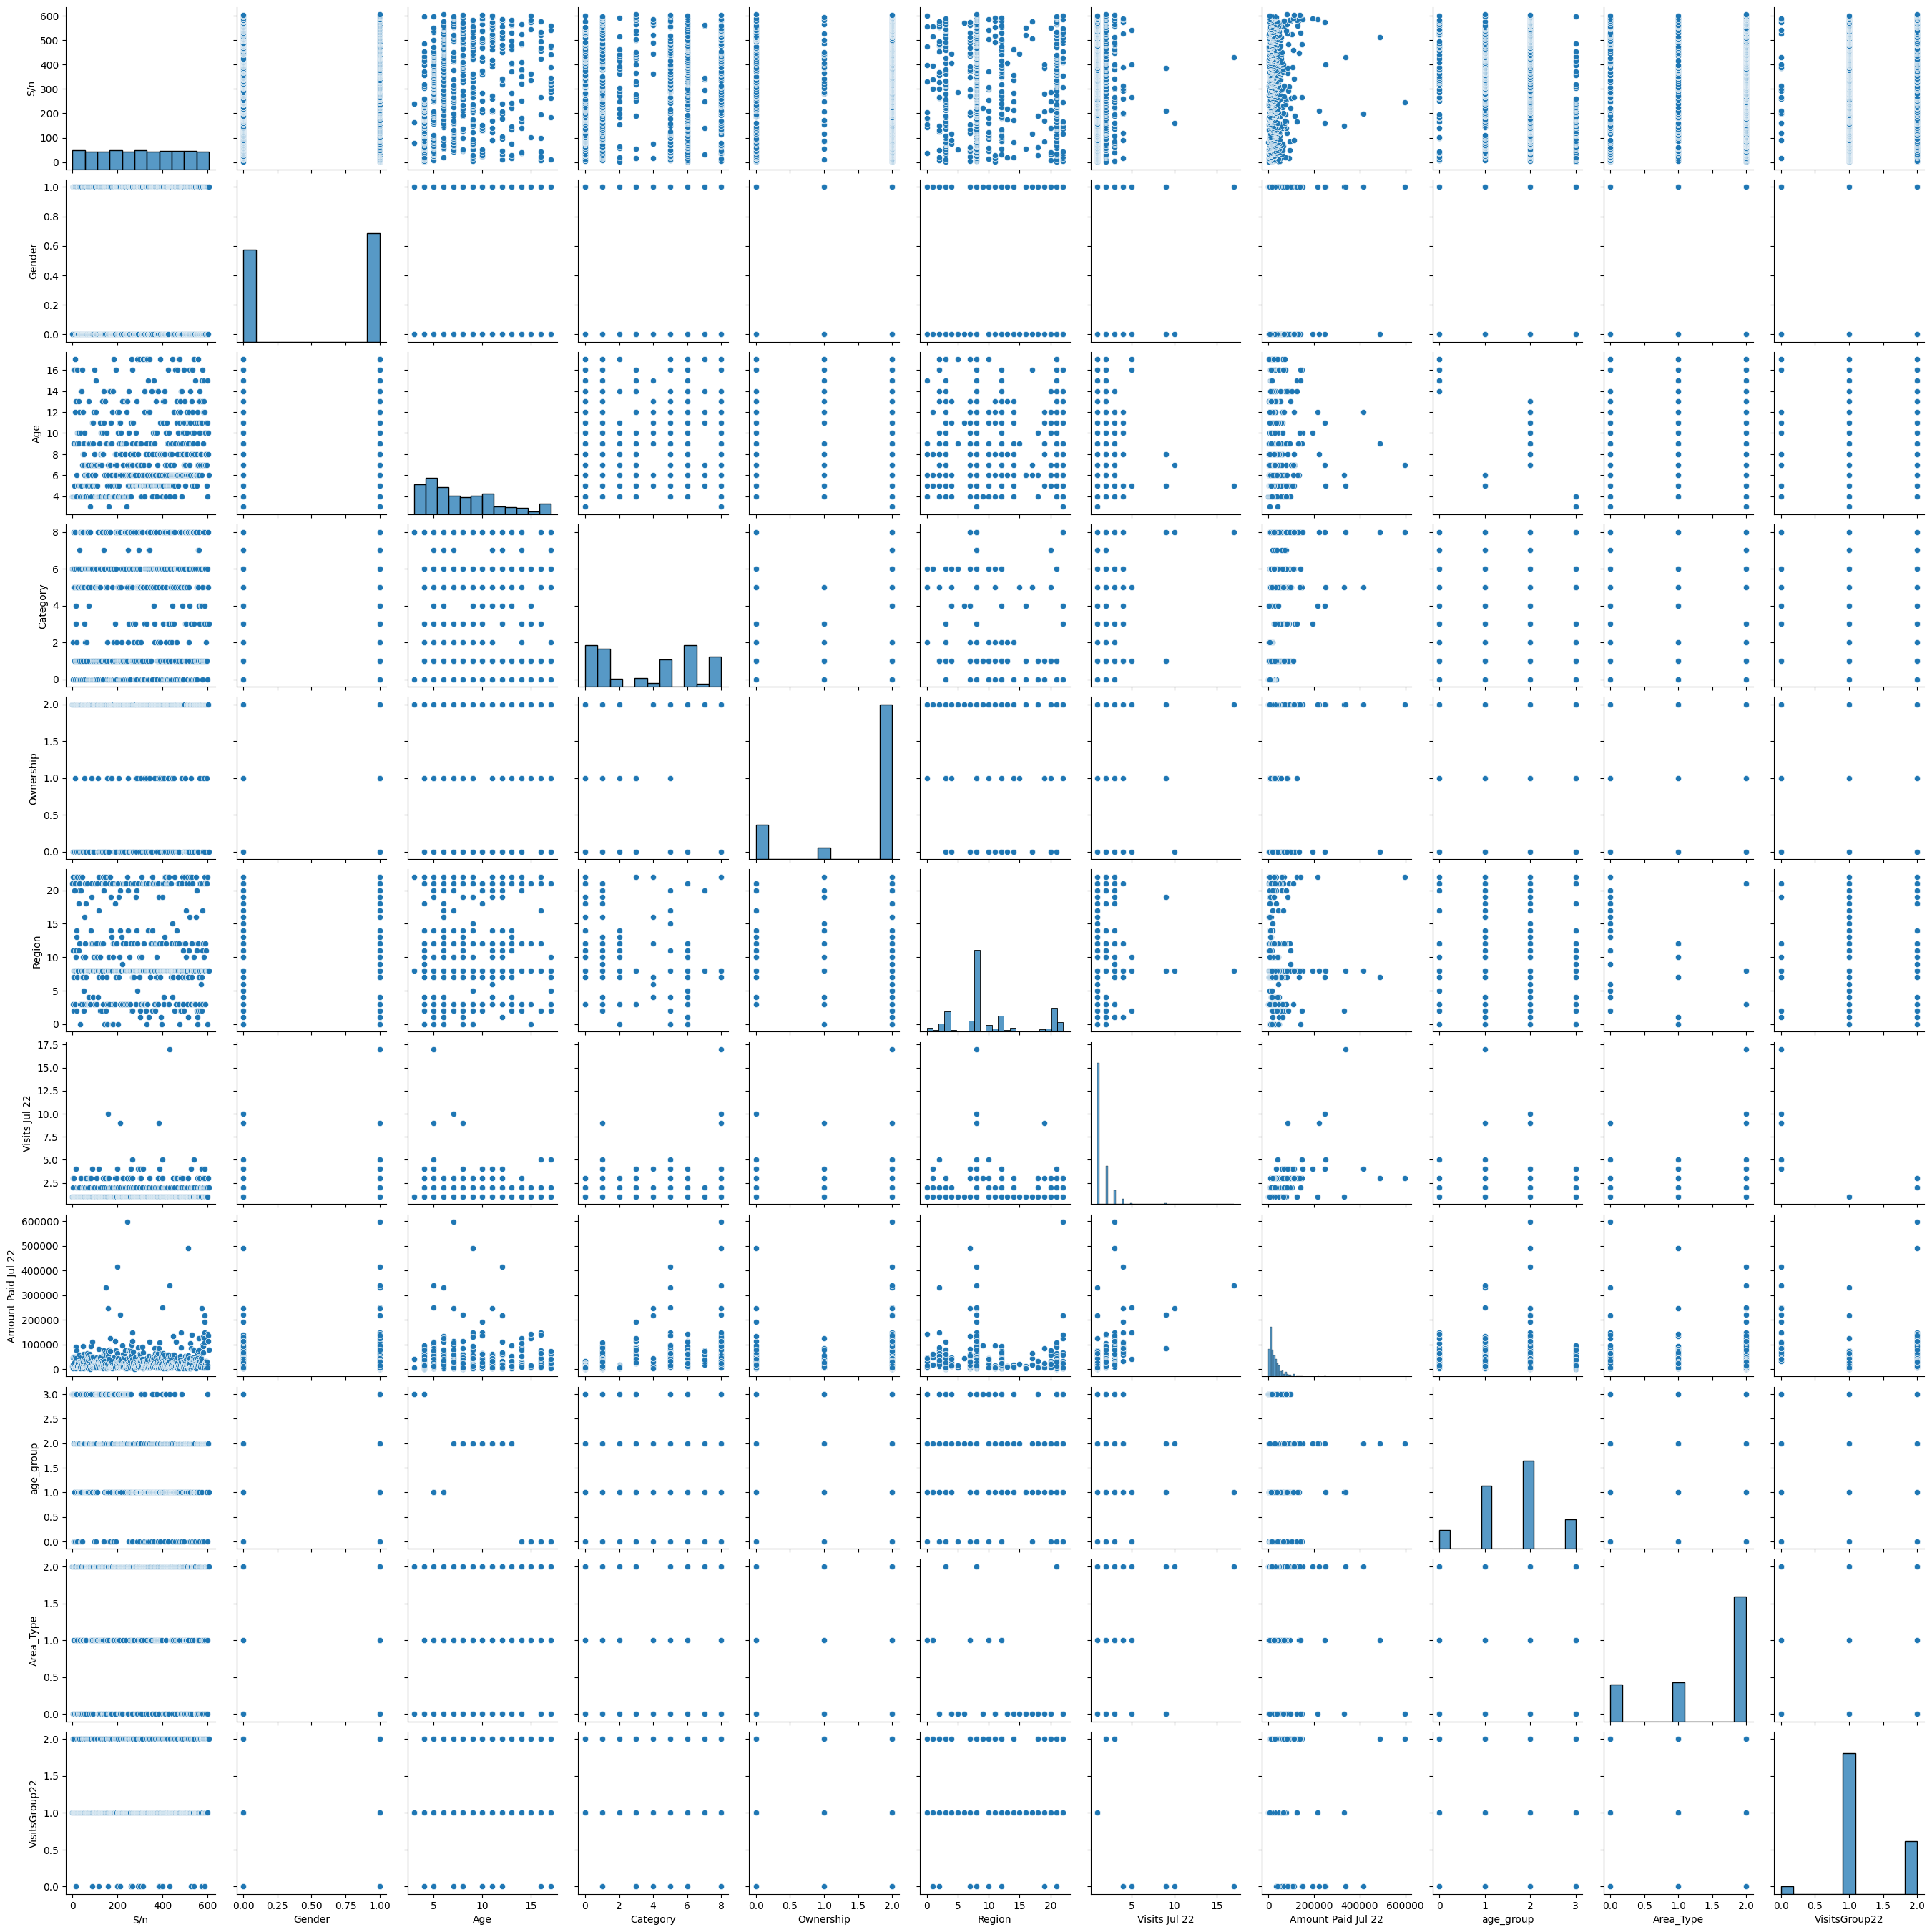

In [218]:
sns.pairplot(df)

Text(0.5, 1.0, 'Correlation Factors Heat Map')

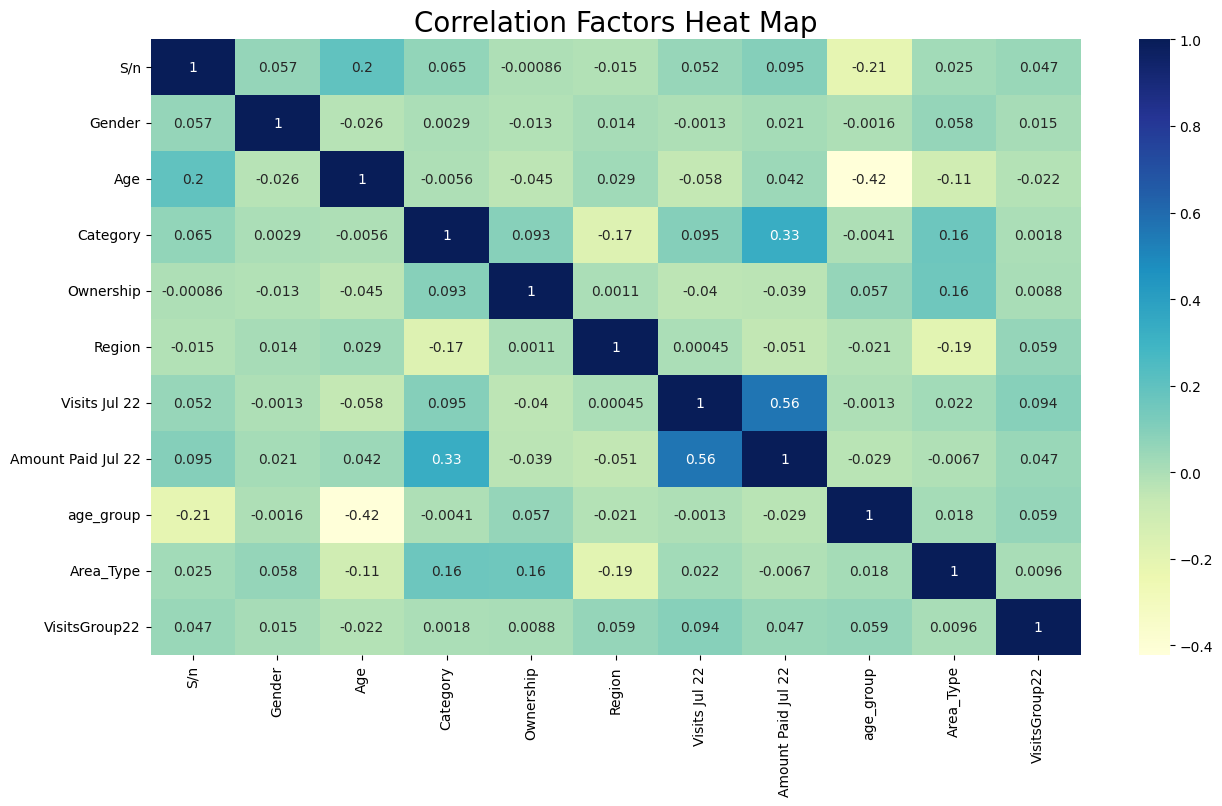

In [219]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot = True, cmap = 'YlGnBu').set_title('Correlation Factors Heat Map', size = '20')

- The heatmap shows variables that are multicollinear in nature and the variables that have high collinearity with the target varible (Amount Paid).

# Preparing Data for Machine Learning

Now that we understand our dataset, it is time to apply machine learning methods to predict future insurance cost of patients based on several factors.

First, we have to prepare our data by splitting it into training and testing data.

In [220]:
from sklearn.model_selection import train_test_split as holdout
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [221]:
features = df.drop(['Amount Paid Jul 22','S/n'], axis = 1)
# features = df.drop(['Amount Paid Jul 22','S/n','age_group','Area_Type','VisitsGroup22'], axis = 1)
targets = df['Amount Paid Jul 22']

In [222]:
x_train, x_test, y_train, y_test = holdout(features, targets, test_size = 0.1, random_state = 0)

### Machine Learning
The goal is to determine the insurance cost for an individual based on several factors. Therefore, this is a regression case. Regression models a target prediction value based on independent variables.
We will use the following algorithms - 
1. Linear Regression
2. Random Forest Regressor
3. Polynomial Regression
4. XGBoost 
5. CatBoost

## 1. Linear Regression

In [223]:
Lin_reg_model = LinearRegression()
Lin_reg_model.fit(x_train, y_train)

print('Intercept:', Lin_reg_model.intercept_)
print('Coefficients:', Lin_reg_model.coef_)

Intercept: -17705.877713718997
Coefficients: [ 3433.03809883  1053.92601618  5228.34017942 -2852.1171033
  -152.41966192 23995.31574568   264.41337576 -3988.31329245
    96.39165441]


In [224]:
from sklearn.metrics import r2_score, mean_squared_error

Lin_reg_model_train_pred = Lin_reg_model.predict(x_train)
Lin_reg_model_test_pred = Lin_reg_model.predict(x_test)

# Mean squared error
Lin_reg_model_train_mse = mean_squared_error(y_train, Lin_reg_model_train_pred)
Lin_reg_model_test_mse = mean_squared_error(y_test, Lin_reg_model_test_pred)
print('MSE train data: {:.3}, \nMSE test data: {:.3}\n'.format(Lin_reg_model_train_mse, Lin_reg_model_test_mse))

# Root Mean Squared error
print('RMSE train data: {:.3}, \nRMSE test data: {:.3}\n'.format(
    np.sqrt(np.absolute(Lin_reg_model_train_mse)), 
    np.sqrt(np.absolute(Lin_reg_model_train_mse))))

# R^2 - coefficient of determination
print('R2 train data: {:.3}, \nR2 test data: {:.3}\n'.format(
    r2_score(y_train,Lin_reg_model_train_pred),
    r2_score(y_test,Lin_reg_model_test_pred)))

# Model Score
ScoreLR = (Lin_reg_model.score(x_test, y_test))*100
print('Model Score:', Lin_reg_model.score(x_test, y_test)*100)

MSE train data: 1.72e+09, 
MSE test data: 2.48e+08

RMSE train data: 4.15e+04, 
RMSE test data: 4.15e+04

R2 train data: 0.387, 
R2 test data: 0.778

Model Score: 77.77209839217089


The model score we achieved generates a relatively good prediction; however, we can improve the model by potentially disregarding unimportant independent variables.

## 2. Random Forest Regressor

In [225]:
from sklearn.ensemble import RandomForestRegressor as rfr

RFR = rfr(n_estimators = 100, random_state = 0, n_jobs = -1)
RFR.fit(x_train, y_train)

x_train_predic = RFR.predict(x_train)
x_test_predic = RFR.predict(x_test)

# Mean squared error
train_mse = metrics.mean_squared_error(x_train_predic, y_train)
test_mse = metrics.mean_squared_error(x_test_predic, y_test)
print('Mean Squared Error train data: %.3f\nMean Squared Error test data: %.3f\n' % (train_mse, test_mse))

# Root Mean Squares error
print('RMSE train data: {:.3}, \nRMSE test data: {:.3}\n'.format(
    np.sqrt(np.absolute(train_mse)), 
    np.sqrt(np.absolute(train_mse))))

# R^2 - coefficient of determination
print('R2 train data: %.3f\nR2 test data: %.3f\n' % (metrics.r2_score(x_train_predic, y_train),metrics.r2_score(x_test_predic, y_test)))

# Model Score
ScoreRFR = (RFR.score(x_test, y_test))*100
print('Model Accuracy Score:', (RFR.score(x_test, y_test))*100)

Mean Squared Error train data: 405801122.807
Mean Squared Error test data: 227089241.132

RMSE train data: 2.01e+04, 
RMSE test data: 2.01e+04

R2 train data: 0.801
R2 test data: 0.738

Model Accuracy Score: 79.66578039272237


The generated model score is an improvement from the previous model!

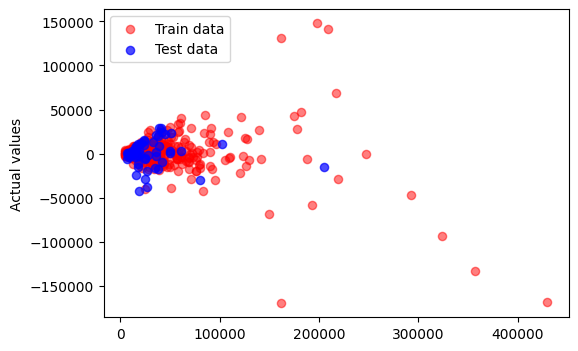

In [226]:
## Plotting actual vs predicted values from random forest regressor

plt.figure(figsize = (6, 4))

# Train data
plt.scatter(x_train_predic, x_train_predic - y_train, c = 'red', marker = 'o', s = 35, alpha = 0.5, label = 'Train data')
# Test data
plt.scatter(x_test_predic, x_test_predic - y_test, c = 'blue', marker = 'o', s = 35, alpha = 0.7, label = 'Test data')


# plt.xlabel("Predicted values")
plt.ylabel('Actual values')
plt.legend(loc = 'upper left')

Now that we have a graph of the actual vs predicted values, let's see the features that contribute heavily towards the prediction. We can do so by performing a feature importance ranking.
- The feature importance method for Random Forests is able draw conclusions about what features contribute most to the decision making in the model and help the user to better understand the drivers behind the model.

### Feature Importance Ranking

1.Visits Jul 22(0.324717)
2.Category(0.195045)
3.Age(0.118840)
4.Region(0.109414)
5.Area_Type(0.063226)
6.VisitsGroup22(0.058885)
7.Gender(0.052084)
8.age_group(0.049517)
9.Ownership(0.028271)


<BarContainer object of 9 artists>

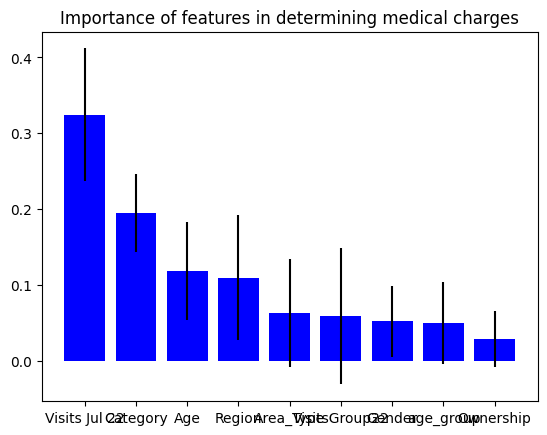

In [227]:
importances = RFR.feature_importances_
std = np.std([tree.feature_importances_ for tree in RFR.estimators_], axis = 0)

indices = np.argsort(importances)[::-1]
variables = ['Gender','Age','Category','Ownership','Region','Visits Jul 22','age_group','Area_Type','VisitsGroup22']

imp_list = []
for value in range(features.shape[1]):
    variable = variables[indices[value]]
    imp_list.append(variable)
    print('%d.%s(%f)' % (value + 1, variable, importances[indices[value]]))
    
# Plotting the feature importances.
plt.figure()
plt.title('Importance of features in determining medical charges')
plt.bar(imp_list, importances[indices], color = 'b', yerr = std[indices], align = 'center')

Based on the feature importances, we can see that the gender, age_group and ownership independent variables are not very important in determining the medical Amount Paid in 2022(Charges) cost for an individual. Therefore, we can eliminate those variables and generate another model to predict the insurance cost without accounting for those variables.
We are only choosing 3 lowest contributing variables to eliminate because it would not be accurate to remove too many potentially unimportant independent variables when generating a model. 

## 3. Polynomial Regression

Prepare data again by eliminating unimportant variables and splitting the data into training and testing data.

In [243]:
from sklearn.preprocessing import PolynomialFeatures
features = df.drop(['Amount Paid Jul 22','Ownership','Gender','age_group'], axis = 1)
target = df['Amount Paid Jul 22']

pol = PolynomialFeatures (degree = 1)
x_pol = pol.fit_transform(features)
x_train, x_test, y_train, y_test = holdout(x_pol, target, test_size = 0.1, random_state = 0)

In [244]:
Pol_reg = LinearRegression()
Pol_reg.fit(x_train, y_train)

y_train_predic = Pol_reg.predict(x_train)
y_test_predic = Pol_reg.predict(x_test)

print('Intercept:', Pol_reg.intercept_)
print('Coefficients:', Pol_reg.coef_)

# Model Score
ScorePoly = (Pol_reg.score(x_test, y_test))*100

print('\nModel Accuracy Score:', (Pol_reg.score(x_test, y_test))*100)

Intercept: -21693.735085132932
Coefficients: [ 0.00000000e+00  1.21566009e+01  9.21602193e+02  5.14340430e+03
 -1.50618088e+02  2.39868510e+04 -4.32825885e+03 -5.45791636e+01]

Model Accuracy Score: 79.72583178688897


### XGBOOST

In [245]:
import pandas as pd
import xgboost
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error as mae


# Train the XGBoost regression model
XGmodel = xgboost.XGBRegressor(objective='reg:squarederror', n_estimators=30, random_state=42)
XGmodel.fit(x_train, y_train)

# Make predictions on the test set
y_pred = XGmodel.predict(x_test)

# Evaluate the model
mseXGboost = mean_squared_error(y_test, y_pred)
maeXGboost = mae(y_test, y_pred)
ScoreXGboost = r2_score(y_test, y_pred)*100
rmseXGBoost = np.sqrt(mseXGboost)

print(f"Root Mean Squared Error: {rmseXGBoost}")
print('Mean squared error:', mseXGboost)
print('Mean absolute error:', maeXGboost)
print('Model R^2 Score:', ScoreXGboost)


Root Mean Squared Error: 14354.789953975069
Mean squared error: 206059994.62274355
Mean absolute error: 10790.150045460668
Model R^2 Score: 81.54879922075787


### CATBoost

In [246]:
import pandas as pd
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error as mae

# define the model and fit the training data
model = CatBoostRegressor(iterations=100, learning_rate=0.1, depth=5, loss_function='RMSE')
model.fit(x_train, y_train)

# make predictions on the test data and evaluate the model
y_pred = model.predict(x_test)

# Evaluate the model
mseCatboost = mean_squared_error(y_test, y_pred)
maeCatboost = mae(y_test, y_pred)
ScoreCatboost = r2_score(y_test, y_pred)*100
rmseCatBoost = np.sqrt(mseCatboost)
print(f"Root Mean Squared Error: {rmseCatBoost}")

print('Mean squared error:', mseCatboost)
print('Mean absolute error:', maeCatboost)
print('Model R^2 Score:', ScoreCatboost)



0:	learn: 51277.2589634	total: 789us	remaining: 78.2ms
1:	learn: 49783.9827432	total: 1.65ms	remaining: 80.9ms
2:	learn: 48406.6663715	total: 2.51ms	remaining: 81.2ms
3:	learn: 47285.5993363	total: 3.38ms	remaining: 81ms
4:	learn: 46085.0157188	total: 4.07ms	remaining: 77.3ms
5:	learn: 45100.8929400	total: 4.7ms	remaining: 73.7ms
6:	learn: 44055.7879163	total: 5.39ms	remaining: 71.7ms
7:	learn: 43182.9563661	total: 6.05ms	remaining: 69.5ms
8:	learn: 42425.1284707	total: 6.51ms	remaining: 65.8ms
9:	learn: 41859.2964044	total: 7.1ms	remaining: 63.9ms
10:	learn: 41188.0785136	total: 7.72ms	remaining: 62.5ms
11:	learn: 40776.4699255	total: 8.32ms	remaining: 61ms
12:	learn: 40140.5029585	total: 8.89ms	remaining: 59.5ms
13:	learn: 39423.8571081	total: 9.62ms	remaining: 59.1ms
14:	learn: 39046.4004318	total: 10.7ms	remaining: 60.6ms
15:	learn: 38493.8909449	total: 11.4ms	remaining: 59.9ms
16:	learn: 37939.9636899	total: 12ms	remaining: 58.5ms
17:	learn: 37579.1819125	total: 12.6ms	remaining: 

### Best Algorithm: 
Based on the perfomed machine learning algorithms, it seems that the Polynomial Regression after eliminating three unimportant independent variables produces the most accurate method and will be used to predict the insurance cost for an individual.

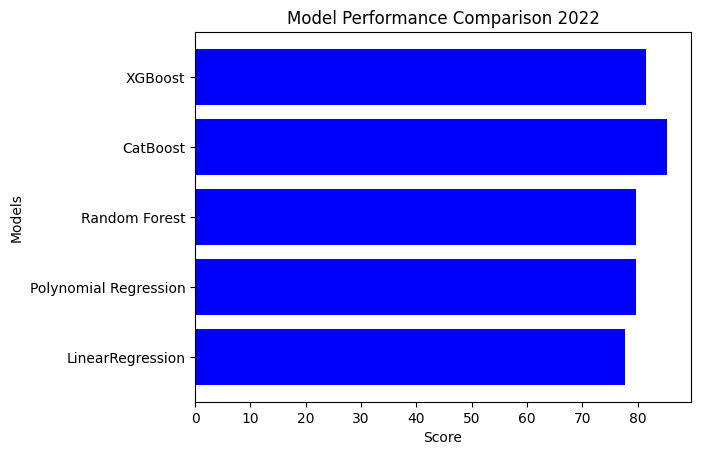

In [247]:
import matplotlib.pyplot as plt
import numpy as np

# define the model names and their corresponding scores
model_names = ['LinearRegression', 'Polynomial Regression','Random Forest', 'CatBoost', 'XGBoost']
model_scores = [ScoreLR, ScorePoly, ScoreRFR, ScoreCatboost, ScoreXGboost]

# create a horizontal bar plot to compare the model scores
plt.barh(model_names, model_scores, color='blue')

# set the chart title and axis labels
plt.title('Model Performance Comparison 2022')
plt.xlabel('Score')
plt.ylabel('Models')


# display the plot
plt.show()


In [233]:
#Independent variables
features.head()

,S/n,Age,Category,Region,Visits Jul 22,age_group,Area_Type,VisitsGroup22
0,1,4,6,21,1,3,2,1
1,2,4,6,3,2,3,2,2
2,3,4,2,11,1,3,0,1
3,4,4,0,22,3,3,0,2
4,5,9,8,7,3,2,1,2


In [234]:
#Dependent variable
targets.head()

0    11600
1    46960
2     3900
3    18460
4    49700
Name: Amount Paid Jul 22, dtype: int64

In [250]:
#Predicting the Medical Charges
y_test_predic = Pol_reg.predict(x_test)

# Creating a dataframe for comparing the Actual Values with the Predicted Values
final_values = pd.DataFrame({'Actual values': y_test, 'Predicted values': y_test_predic})
final_values.head()

,Actual values,Predicted values
412,12950,2146.219365
96,7780,3781.892899
478,54000,49635.412489
426,14950,33291.668318
564,34150,36853.360421
